# ROZDZIAL 4 - UCZENIE MODELI

## Regresja liniowa

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = 2*np.random.rand(100, 1)
y = 4+ 3*X+np.random.rand(100, 1)

In [5]:
X.shape, y.shape

((100, 1), (100, 1))

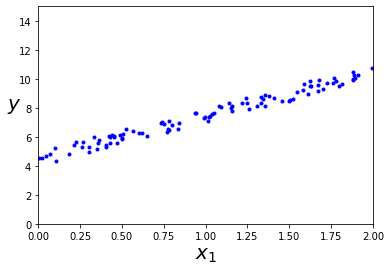

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
X_b = np.c_[np.ones((100, 1)), X]

In [16]:
X_b.shape

(100, 2)

In [18]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [19]:
theta_best

array([[4.52655109],
       [2.962896  ]])

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.52655109],
       [10.4523431 ]])

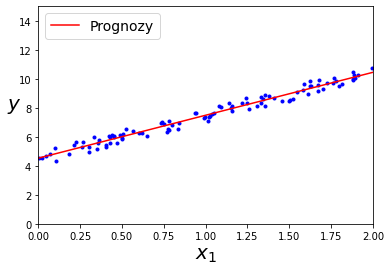

In [28]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, 'r', label="Prognozy")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([4.52655109]), array([[2.962896]]))

In [35]:
lin_reg.predict(X_new)

array([[ 4.52655109],
       [10.4523431 ]])

In [36]:
# metoda najmniejszych kwadratow
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.52655109],
       [2.962896  ]])

## Wsadowy gradient prosty

In [38]:
eta = 0.1 # wspolczynik uczenia
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [39]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta -eta*gradients

In [40]:
theta

array([[4.52655109],
       [2.962896  ]])

In [41]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

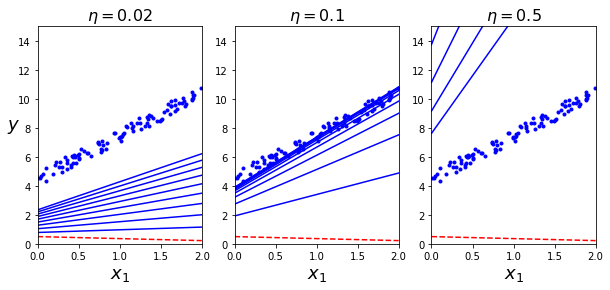

In [43]:
np.random.seed(42)
theta = np.random.randn(2,1)  # inicjalizacja losowa

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastyczny spadek wzdłuż gradientu

In [45]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

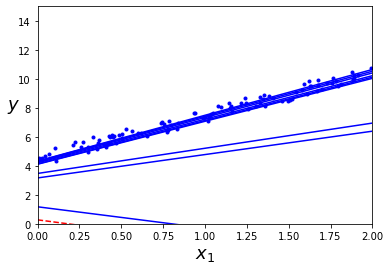

In [67]:
n_epochs = 50
t0, t1 = 5, 50  # hiperparametry harmonogramu uczenia

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # inicjalizacja losowa

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [60]:
theta

array([[4.54616291],
       [2.98072275]])

In [62]:
from sklearn.linear_model import SGDRegressor

In [64]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [65]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52011007]), array([2.98999172]))

## Schodzenie po gradiencie z mini-grupami

In [69]:
shuffled_indices = np.random.permutation(m)
shuffled_indices, shuffled_indices.shape

(array([ 5, 68, 39, 50, 61, 57, 17, 21, 12, 29,  7,  3, 73, 36, 62, 45, 75,
        86, 70, 71, 40, 31, 48, 63, 13, 37, 19, 25, 24, 52, 97, 88, 11, 81,
        58, 99,  4, 64, 60, 74, 90, 84, 79, 87, 72, 94, 32, 51, 18,  6, 80,
        15, 93, 59, 66, 53, 95, 49, 46, 76, 34, 83, 47, 22, 78,  9,  1, 10,
        98, 28, 55, 27, 96, 67, 85, 38, 16,  8, 92, 42, 23,  0,  2, 33, 14,
        54, 20, 56, 43, 44, 82, 65, 26, 30, 35, 91, 89, 77, 69, 41]),
 (100,))

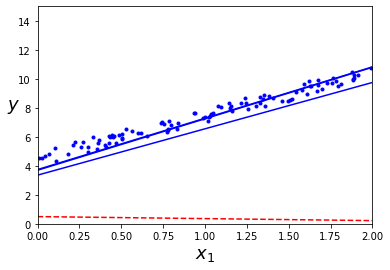

In [74]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # inicjalizacja losowa

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        if epoch == 0 and t < 4:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [75]:
theta

array([[4.51837641],
       [2.95913825]])

In [76]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

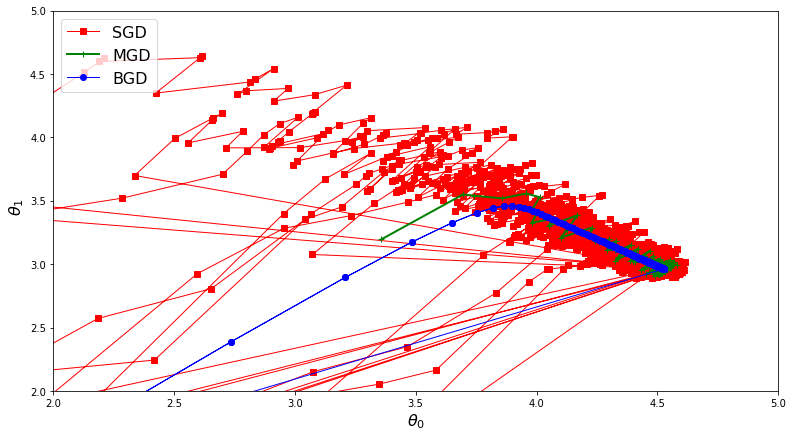

In [84]:
plt.figure(figsize=(13,7))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MGD")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="BGD")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=16)
plt.ylabel(r"$\theta_1$   ", fontsize=16)
plt.axis([2, 5, 2, 5])
plt.show()